### Base de datos

### Importar librerias

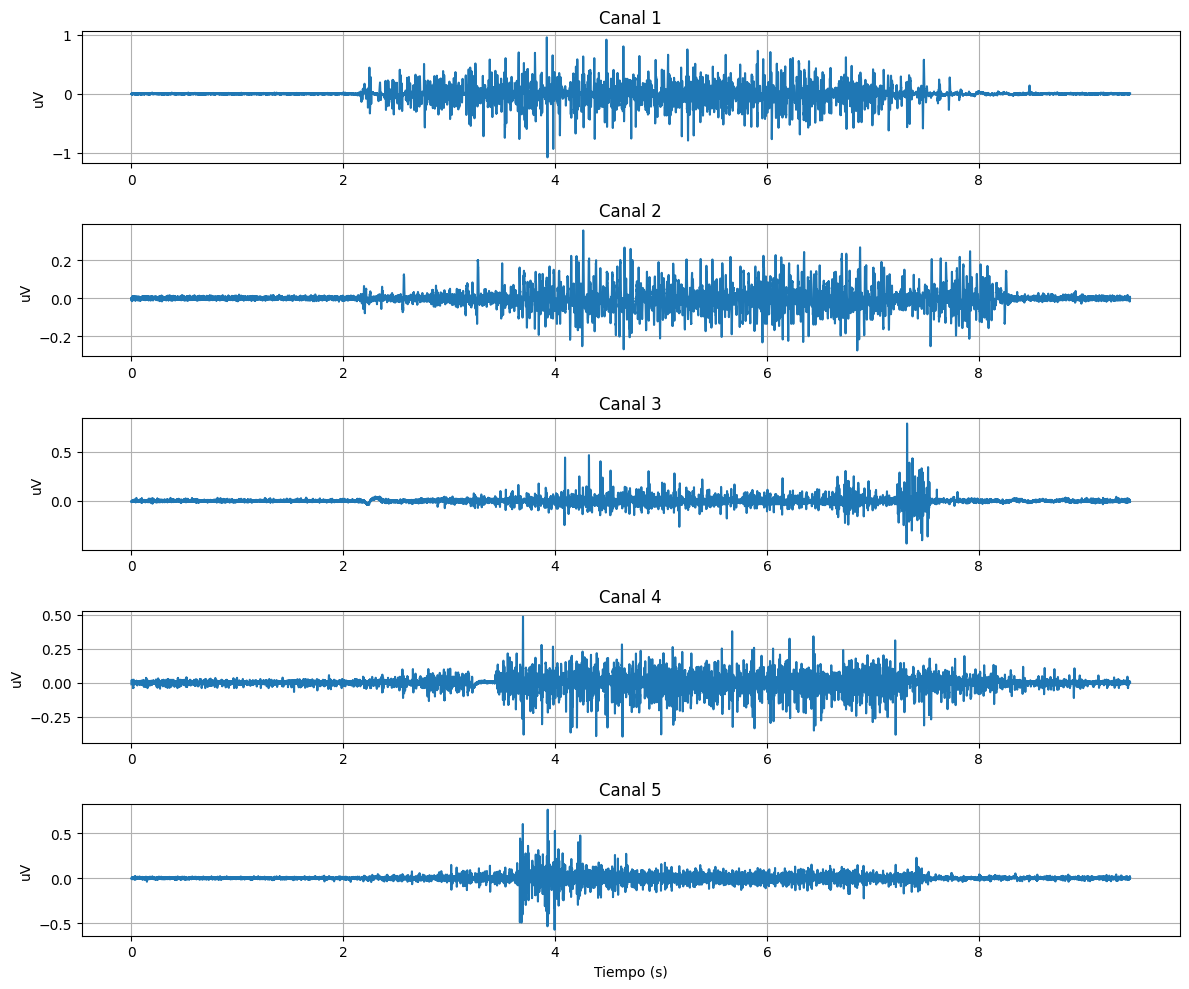

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

ws = loadmat("data/WS_P1_S1.mat", squeeze_me=True, struct_as_record=False)["ws"]
w1 = ws.win[0]

emg1 = np.asarray(w1.emg)
t1 = np.asarray(w1.emg_t).ravel()

n_channels = emg1.shape[1]
plt.figure(figsize=(12, 2*n_channels))
for i in range(n_channels):
    plt.subplot(n_channels, 1, i+1)
    plt.plot(t1, emg1[:, i])
    plt.ylabel("uV")
    plt.grid(True)
    plt.title(f"Canal {i+1}")
plt.xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()